In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
if "Unnamed: 0" in df.columns:
    df = df.drop("Unnamed: 0", axis=1)

In [9]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("5-10","05-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
#gender distribution
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

#from the above bar graph we can analyze that:
#the number of females in the data is more than the number of males.

In [34]:
#Impact of Parents Education on Students Score
gb=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


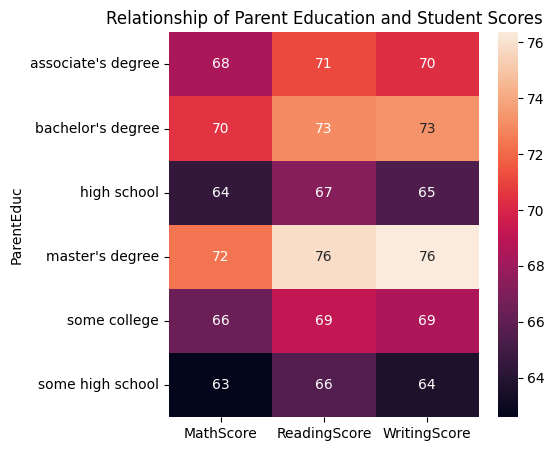

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("Relationship of Parent Education and Student Scores")
plt.show()

#from the above chart we have concluded that the parents education have a good impact on the Students scores

In [35]:
#Impact of Parents Marital Status on Students Score
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


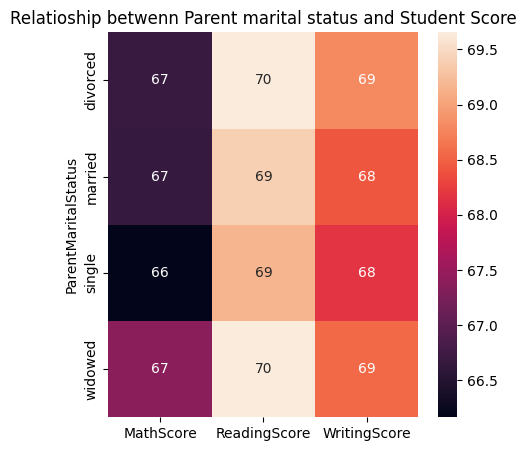

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relatioship betwenn Parent marital status and Student Score")
plt.show()

#from the above chart we can conclude that the parents marital status has no or very less impact on the students scores.

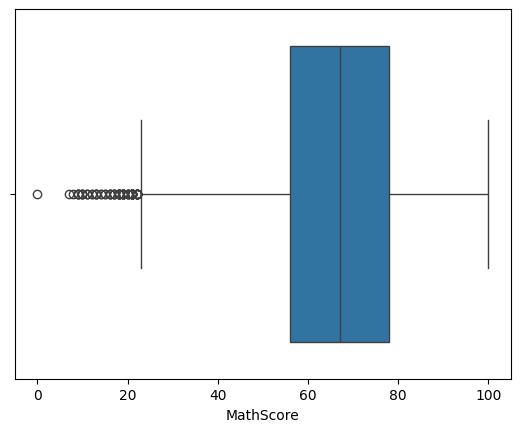

In [19]:
sns.boxplot(data=df,x="MathScore")
plt.show()

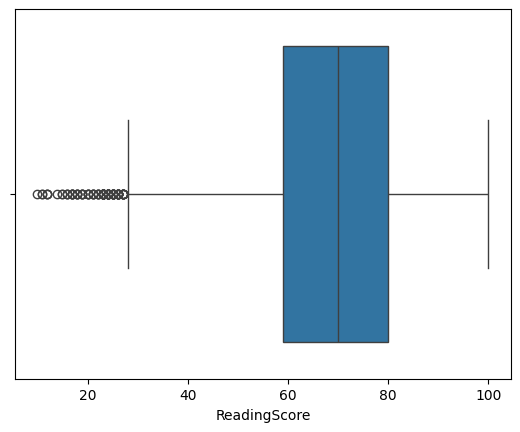

In [20]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

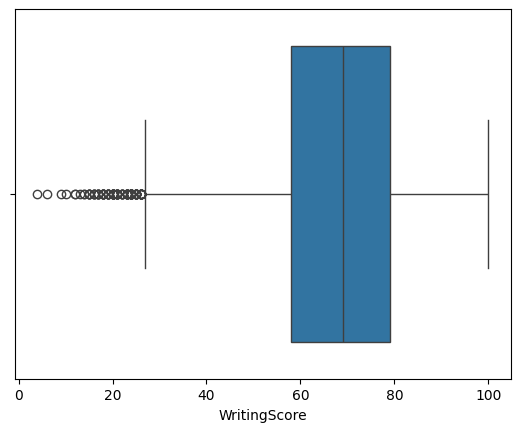

In [21]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

#from the above 3 charts we can see and conclude that maths is a tough subject or students are not able to score well in maths as compared to reading and writing ,
as we can observe that the their are more number of outliers in maths and also a 0 score in maths compared to other 2 subjects

In [24]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


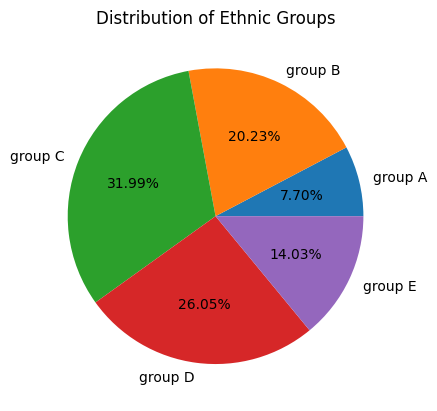

In [33]:
#distribution of Ethnic Group
groupA = df.loc[(df["EthnicGroup"]=="group A")].count()
groupB = df.loc[(df["EthnicGroup"]=="group B")].count()
groupC = df.loc[(df["EthnicGroup"]=="group C")].count()
groupD = df.loc[(df["EthnicGroup"]=="group D")].count()
groupE = df.loc[(df["EthnicGroup"]=="group E")].count()

mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
l=["group A","group B","group C","group D","group E"]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

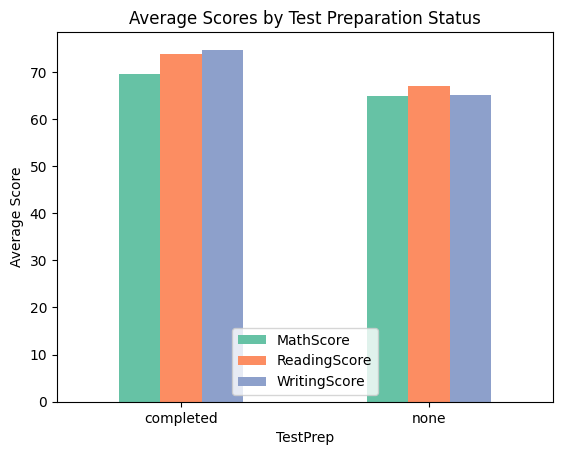

In [36]:
#Test Preparation vs Performance
df.groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Scores by Test Preparation Status')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()


Students who completed test preparation scored significantly higher in all subjects compared to those who did not, highlighting the positive impact of test prep programs on academic outcomes.

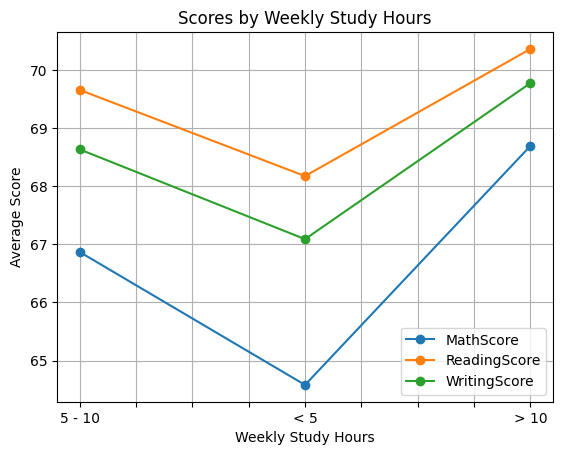

In [37]:
#Weekly Study Hours vs Performance

df.groupby('WklyStudyHours')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind='line', marker='o')
plt.title('Scores by Weekly Study Hours')
plt.ylabel('Average Score')
plt.xlabel('Weekly Study Hours')
plt.grid(True)
plt.show()


There is a general trend showing increased study hours lead to better scores, especially in Math and Writing. Students studying more than 10 hours per week perform noticeably better, confirming the value of consistent study habits.

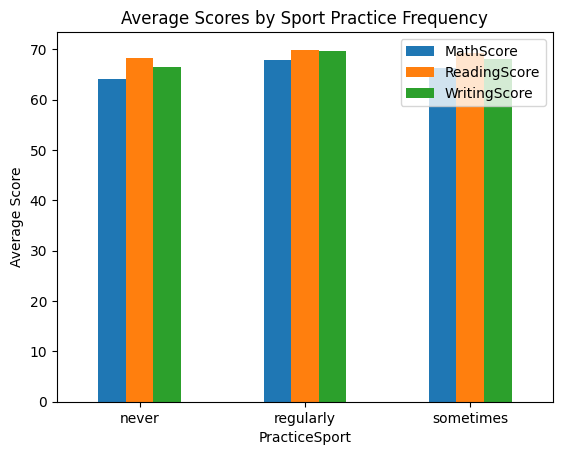

In [38]:
#Sports Activity vs Performance

df.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind='bar')
plt.title('Average Scores by Sport Practice Frequency')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

Students who regularly or sometimes participate in sports tend to perform better than those who never participate, indicating that physical activity might support cognitive function and discipline.



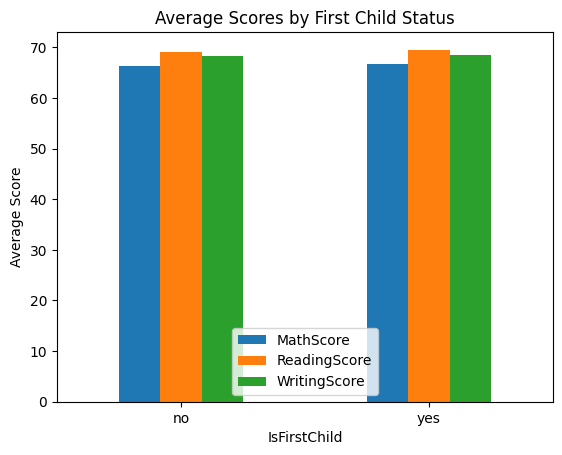

In [39]:
#First Child vs Performance
df.groupby('IsFirstChild')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind='bar')
plt.title('Average Scores by First Child Status')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

First children slightly outperform non-first children on average. This could be due to greater parental attention or responsibility at home, but the difference is not very large.

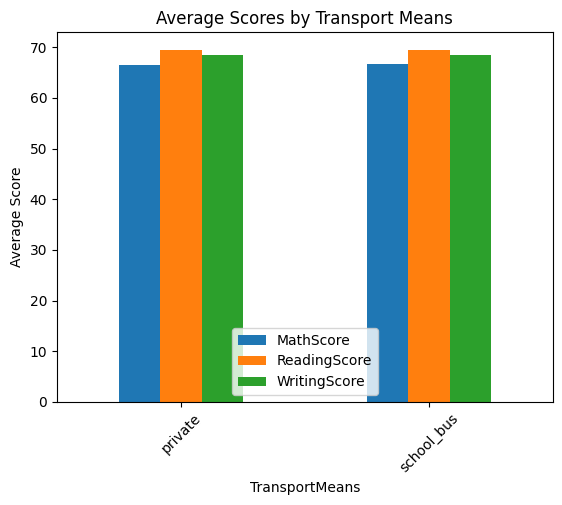

In [40]:
#Transport Means vs Performance
df.groupby('TransportMeans')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind='bar')
plt.title('Average Scores by Transport Means')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

Students who walk or use private transport tend to have slightly better scores than those who use the school bus or public transport, possibly due to shorter commute times or parental involvement. However, differences are moderate.